In [1]:
import numpy as np
import xarray as xr
import math
import matplotlib.pyplot as plt
import pandas
from scipy import stats
from numpy import matlib
import matplotlib.path as mpath
import matplotlib.ticker as mticker 
import cartopy.crs as ccrs
import cartopy.feature as cf
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib import mlab
from scipy import integrate

## Read the daily temperature

### FOCI-HIST

In [2]:
%cd -b sw060
sw060_t = xr.open_dataset('FOCI1.7-SW060_echam6_echam_1958-2013_st_pl_zm.nc', decode_times=True)
%cd -b sw061
sw061_t = xr.open_dataset('FOCI1.7-SW061_echam6_echam_1958-2013_st_pl_zm.nc', decode_times=True)
%cd -b jh019
jh019_t = xr.open_dataset('FOCI1.9.4-JH019_echam6_echam_1958-2013_st_pl_zm.nc', decode_times=True)

(bookmark:sw060) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


### FOCI-MOZ

In [3]:
%cd -b sw054
sw054_t = xr.open_dataset('FOCI1.4-SW054_echam6_echam_1958-2013_st_pl_zm.nc', decode_times=True)
%cd -b sw064
sw064_t = xr.open_dataset('FOCI1.4-SW064_echam6_echam_1958-2013_st_pl_zm.nc', decode_times=True)
%cd -b sw065
sw065_t = xr.open_dataset('FOCI1.4-SW065_echam6_echam_1958-2013_st_pl_zm.nc', decode_times=True)

(bookmark:sw054) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


## Read the zonal mean daily SW heating rates

### FOCI-HIST

In [4]:
%cd -b sw060
sw060_sw = xr.open_dataset('FOCI1.7-SW060_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
%cd -b sw061
sw061_sw = xr.open_dataset('FOCI1.7-SW061_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
%cd -b jh019
jh019_sw = xr.open_dataset('FOCI1.9.4-JH019_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)

(bookmark:sw060) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW060/outdata/echam6
(bookmark:sw061) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.7-SW061/outdata/echam6
(bookmark:jh019) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.9.4-JH019/outdata/echam6


### FOCI-MOZ

In [5]:
%cd -b sw054
sw054_sw = xr.open_dataset('FOCI1.4-SW054_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
%cd -b sw064
sw064_sw = xr.open_dataset('FOCI1.4-SW064_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)
%cd -b sw065
sw065_sw = xr.open_dataset('FOCI1.4-SW065_echam6_tdiag_1958-2013_dtdt_rheat_sw_pl_zm.nc', decode_times=True)

(bookmark:sw054) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW054/outdata/echam6
(bookmark:sw064) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW064/outdata/echam6
(bookmark:sw065) -> /gxfs_work1/geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6
/gxfs_work1/fs1/work-geomar/smomw418/models/foci/experiments/FOCI1.4-SW065/outdata/echam6


## Compute polar cap averages at 100 hPa and select September to Novmber

In [6]:
def sel_SON(data):
    
    def is_day(day, d, month, m):
        return (day==d) & (month==m) # returns an array with true where the day of the year is d and false elswhere
                        
    data_out = data.sel(time=is_day(data['time.day'],1, data['time.month'],9)).groupby('time.year').mean(dim='time')  
       
    # September
    for d in range(2,31):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],9)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # October
    for d in range(1,32):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],10)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
    # November
    for d in range(1,31):
        data_day = data.sel(time=is_day(data['time.day'],d, data['time.month'],11)).groupby('time.year').mean(dim='time')
        data_out = xr.concat((data_out, data_day), dim='day')
        
    day = np.arange(244,335)
    data_out = data_out.assign_coords(day=day)
    
    return data_out

In [7]:
def prep_timeseries(data):
    
    # Polar cap average at 100 hPa
    polar = data.sel(plev=10000, lat=slice(-70,-90)).mean(dim='lat') 
    # Select only Sept-Nov
    son = sel_SON(polar)
    # Compute anomalies for each day with respect to 1958-2013
    anom = son - son.mean(dim='year')
    
    return son, anom    

In [8]:
sw054_t_full, sw054_t_anom = prep_timeseries(sw054_t.st)
sw064_t_full, sw064_t_anom = prep_timeseries(sw064_t.st)
sw065_t_full, sw065_t_anom = prep_timeseries(sw065_t.st)
sw060_t_full, sw060_t_anom = prep_timeseries(sw060_t.st)
sw061_t_full, sw061_t_anom = prep_timeseries(sw061_t.st)
jh019_t_full, jh019_t_anom = prep_timeseries(jh019_t.st)

In [9]:
sw054_sw_full, sw054_sw_anom = prep_timeseries(sw054_sw.dtdt_rheat_sw.squeeze())
sw064_sw_full, sw064_sw_anom = prep_timeseries(sw064_sw.dtdt_rheat_sw.squeeze())
sw065_sw_full, sw065_sw_anom = prep_timeseries(sw065_sw.dtdt_rheat_sw.squeeze())
sw060_sw_full, sw060_sw_anom = prep_timeseries(sw060_sw.dtdt_rheat_sw.squeeze())
sw061_sw_full, sw061_sw_anom = prep_timeseries(sw061_sw.dtdt_rheat_sw.squeeze())
jh019_sw_full, jh019_sw_anom = prep_timeseries(jh019_sw.dtdt_rheat_sw.squeeze())

## Temperature and Q_sw combined plot

In [10]:
moz_t_full = xr.concat((sw054_t_full, sw064_t_full, sw065_t_full), dim='exp').mean(dim='exp')
hist_t_full = xr.concat((sw060_t_full, sw061_t_full, jh019_t_full), dim='exp').mean(dim='exp')

moz_t_anom = xr.concat((sw054_t_anom, sw064_t_anom, sw065_t_anom), dim='exp').mean(dim='exp')
hist_t_anom = xr.concat((sw060_t_anom, sw061_t_anom, jh019_t_anom), dim='exp').mean(dim='exp')

In [12]:
moz_sw_full = xr.concat((sw054_sw_full, sw064_sw_full, sw065_sw_full), dim='exp').mean(dim='exp')
hist_sw_full = xr.concat((sw060_sw_full, sw061_sw_full, jh019_sw_full), dim='exp').mean(dim='exp')

moz_sw_anom = xr.concat((sw054_sw_anom, sw064_sw_anom, sw065_sw_anom), dim='exp').mean(dim='exp')
hist_sw_anom = xr.concat((sw060_sw_anom, sw061_sw_anom, jh019_sw_anom), dim='exp').mean(dim='exp')

In [17]:
def plot_day_year_t(data):
    con = plt.pcolor(data.year, data.day, data.squeeze(), vmin=-20, vmax = 20, cmap='RdBu_r')
    ax=plt.gca()
    plt.yticks([244, 274, 305, 334], ())
    plt.xticks(np.arange(1960,2014,10))
    ax.tick_params(axis='both', labelsize=30)
    #ax.minorticks_on()
    plt.text(1955, 259, 'Sept', fontsize=30, rotation=90, va='center')
    plt.text(1955, 289, 'Oct', fontsize=30, rotation=90, va='center')
    plt.text(1955, 320, 'Nov', fontsize=30, rotation=90, va='center')
    
    return con

In [14]:
def plot_day_year_Q(data):
    con = plt.pcolor(data.year, data.day, data, vmin=-0.3, vmax =0.3, cmap='RdBu_r')
    ax=plt.gca()
    plt.yticks([244, 274, 305, 334], ())
    plt.xticks(np.arange(1960,2014,10))
    ax.tick_params(axis='both', labelsize=30)
    #ax.minorticks_on()
    plt.text(1955, 259, 'Sept', fontsize=30, rotation=90, va='center')
    plt.text(1955, 289, 'Oct', fontsize=30, rotation=90, va='center')
    plt.text(1955, 320, 'Nov', fontsize=30, rotation=90, va='center')
    
    return con

/gxfs_home/geomar/smomw418/miniconda3/envs/py3_std/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


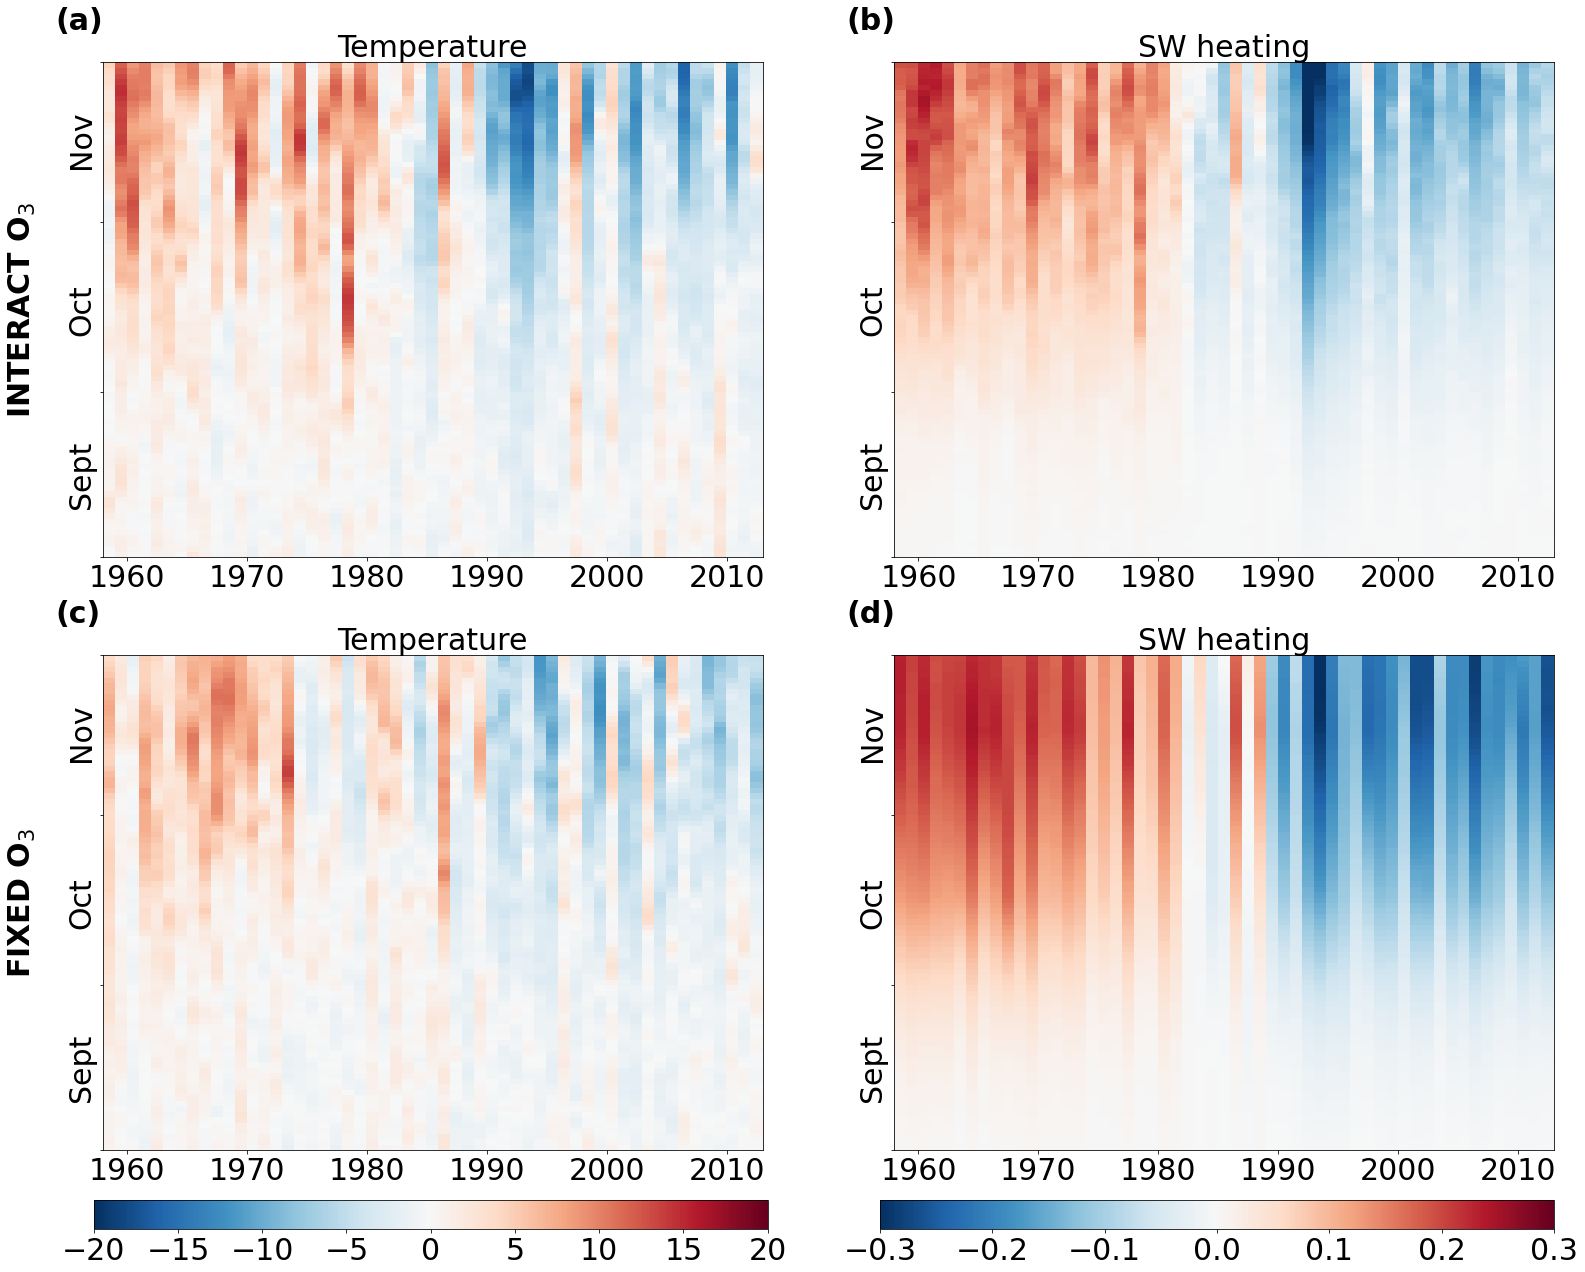

In [18]:
fig = plt.figure(figsize=(26,20))

plt.subplot(221)
con = plot_day_year_t(moz_t_anom)
plt.title('Temperature', fontsize=30)
plt.text(1954, 340, '(a)', fontsize=30, fontweight='bold')
plt.text(1950, 289, 'INTERACT O$_3$', fontsize=30, rotation=90, va='center', fontweight='bold')

plt.subplot(223)
con = plot_day_year_t(hist_t_anom)
plt.title('Temperature', fontsize=30)
plt.text(1954, 340, '(c)', fontsize=30, fontweight='bold')
plt.text(1950, 289, 'FIXED O$_3$', fontsize=30, rotation=90, va='center', fontweight='bold')

ticks = np.arange(-25,26,5)
cax = plt.axes([0.12, 0.07, 0.36, 0.02])
c = plt.colorbar(con, cax=cax, ticks=ticks, orientation='horizontal')
c.ax.tick_params(labelsize=30)

plt.subplot(222)
con = plot_day_year_Q(moz_sw_anom)
plt.title('SW heating', fontsize=30)
plt.text(1954, 340, '(b)', fontsize=30, fontweight='bold')

plt.subplot(224)
con = plot_day_year_Q(hist_sw_anom)
plt.title('SW heating', fontsize=30)
plt.text(1954, 340, '(d)', fontsize=30, fontweight='bold')

ticks = np.arange(-0.3,0.4,0.1)
cax = plt.axes([0.54, 0.07, 0.36, 0.02])
c = plt.colorbar(con, cax=cax, ticks=ticks, orientation='horizontal')
c.ax.tick_params(labelsize=30)